<h1><center><strong>Analisis Precios de Vehiculos</strong></center></h1>

## Información Preliminar

### Ambiente y librerias

In [1]:
# Importando librerias del proyecto

import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Carga de datos

In [ ]:
# Cargar archivo con datos del proyecto con pandas

path = 'vehicles_us.csv'
data = pd.read_csv(path)

In [3]:
# Muestra aleatoria de datos

data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2004,18995,2011.0,gmc sierra 1500,good,NaN,gas,156262.0,automatic,truck,NaN,1.0,2018-07-06,55
11407,7900,2018.0,nissan murano,good,6.0,gas,22000.0,automatic,SUV,black,NaN,2019-03-06,55
4008,9995,2011.0,dodge dakota,excellent,6.0,gas,163000.0,automatic,truck,silver,1.0,2019-02-22,33
23604,4995,2007.0,ford mustang,good,6.0,gas,238191.0,automatic,coupe,red,NaN,2018-09-12,47
29921,6500,2003.0,gmc sierra 1500,good,8.0,gas,NaN,automatic,pickup,blue,1.0,2018-10-01,42
9794,20990,2011.0,ford f-350 sd,good,8.0,gas,63887.0,automatic,truck,white,1.0,2019-01-15,24
49195,15000,2011.0,ford f-150,good,8.0,gas,64000.0,automatic,pickup,NaN,1.0,2018-12-10,53
6957,35988,2019.0,chevrolet silverado,like new,8.0,gas,7000.0,automatic,truck,black,1.0,2019-02-01,116
35549,4900,2004.0,honda pilot,good,6.0,gas,138348.0,automatic,SUV,silver,1.0,2018-10-24,12
30529,10600,2010.0,subaru forester,excellent,4.0,gas,93826.0,automatic,SUV,grey,1.0,2018-11-16,16


In [4]:
# Verificar formato de nombres de columnas

data.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [5]:
# Verificar el tamaño del dataframe

data.shape

(51525, 13)

In [6]:
# Informacion general del dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
# Informacion estadistica del dataset

data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [8]:
# Verificar valores unicos de en columnas que contienen valores repetidos

print('Los valores únicos en la columna "is_4wd" son:', data.is_4wd.unique())
print()
print('Los valores únicos en la columna "transmission" son:', data.transmission.unique())
print()
print('Los valores únicos en la columna "condition" son:', data.condition.unique())
print()
print('Los valores únicos en la columna "cylinders" son:', sorted(data.cylinders.unique()))
print()
print('Los valores únicos en la columna "model" son:', sorted(data.model.unique()))

Los valores únicos en la columna "is_4wd" son: [ 1. nan]

Los valores únicos en la columna "transmission" son: ['automatic' 'manual' 'other']

Los valores únicos en la columna "condition" son: ['good' 'like new' 'fair' 'excellent' 'salvage' 'new']

Los valores únicos en la columna "cylinders" son: [3.0, 4.0, 5.0, 6.0, 8.0, nan, 10.0, 12.0]

Los valores únicos en la columna "model" son: ['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse', 'chrysler 200', 'chrysler 300', 'chrysler town & country', 'dodge charger', 'dodge dakota', 'dodge grand caravan', 'ford econoline', 'ford edg

**Hallazgos:**

- El conjunto de datos se compone de 51.525 registros y 13 variables, de las cuales, 5 columnas contienen valores nulos.

- Las columnas model_year, cylinders y odometer son actualmente de tipo de dato flotante, pero deberían ser enteros.

- La columna date_posted contiene datos de fecha, pero actualmente está almacenada como una cadena de texto.

- La columna is_4wd debería ser de tipo booleano, donde el valor 1 representa un vehículo con tracción en las cuatro ruedas, mientras que el 0 representa un vehículo sin tracción 4x4. Parece que el número 0 está representado por valores NaN, lo que resulta en el menor número de entradas no nulas en esta columna.

- Existe una diferencia notable entre los valores promedio y mediana en las columnas price y days_listed, lo cual indica la posible presencia de valores atípicos.

- Los valores más bajos en las columnas odometer y days_listed son 0. Un valor de 0 en odometer podría indicar un vehículo nuevo, mientras que un 0 en days_listed parece inusual.

- Algunas columnas tienen una cantidad significativa de valores únicos, lo cual puede ser útil para categorizar los datos.

En general, los datos parecen ser suficientes, pero requieren limpieza. En el siguiente paso, se realizará la limpieza de los datos, lo que implica abordar los valores faltantes y cambiar los tipos de datos según la información anteriormente detallada.

## Preprocesamiento de datos

### Tratamiento valores ausentes

In [9]:
# Verificar la existencia de valores ausentes

data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Cada columna con valores faltantes tiene características únicas y, por lo tanto, requiere enfoques diferentes para tratarlas. Se iniciará con las más simples: `is_4wd` y `paint_color`.

Para la columna `is_4wd`, se reemplazaran los valores faltantes por 0, lo que indica que el vehículo no tiene tracción en las cuatro ruedas. También se modificara el tipo de dato de esta columna a booleano, ya que consiste principalmente en valores de sí o no.

En cuanto a la columna `paint_color`, dado que está relativamente poco relacionada con el enfoque principal del análisis, se rellenaran los valores faltantes con 'unknown' sin afectar significativamente la calidad general de los datos.

In [10]:
# Implementación de correcciones a los valores ausentes

data['is_4wd'] = data['is_4wd'].where(data['is_4wd'] == 1, 0).astype('bool')
data['paint_color'] = data['paint_color'].fillna('unknown')

Los valores en las columnas `paint_color` e `is_4wd`, ya fueron corregidos, y los tipos de datos se actualizaron correctamente. A continuación, se abordaran los valores faltantes en las tres columnas restantes.

Las columnas model_year, cylinders y odometer son fundamentales para el análisis, por lo que no se pueden eliminar. Sin embargo, imputar los valores faltantes usando métodos como la mediana, puede introducir sesgos en el análisis.

Además, estas columnas están interrelacionadas con otras. Por ejemplo, el valor de odometer está relacionado con el año de fabricación del vehículo (model_year, que también tiene valores faltantes) y con su estado (condition). La columna cylinders depende en gran medida de la columna model, la cual tiene numerosos valores únicos. Rellenar los valores faltantes con la mediana distorsionaría los datos a ese nivel.

Para evitar errores potenciales y distorsiones en los datos, se ha determinado eliminar todas las filas que contienen valores faltantes en estas tres columnas.

In [11]:
# Eliminar registros con valores NaN

data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [12]:
# Verificar el resultado

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36419 entries, 0 to 36418
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         36419 non-null  int64  
 1   model_year    36419 non-null  float64
 2   model         36419 non-null  object 
 3   condition     36419 non-null  object 
 4   cylinders     36419 non-null  float64
 5   fuel          36419 non-null  object 
 6   odometer      36419 non-null  float64
 7   transmission  36419 non-null  object 
 8   type          36419 non-null  object 
 9   paint_color   36419 non-null  object 
 10  is_4wd        36419 non-null  bool   
 11  date_posted   36419 non-null  object 
 12  days_listed   36419 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 3.4+ MB


La eliminación de registros con valores ausentes en las columnas model_year, cylinders y odometer, representa una pérdida del 30% aproximadamente de los datos. Sin embargo, incluso con 36.419 filas restantes, el conjunto de datos sigue siendo considerablemente grande, robusto y lo suficientemente representativo para los objetivos actuales del análisis.

Aunque la pérdida de datos no es ideal, es fundamental priorizar la calidad y la confiabilidad de la información para obtener resultados precisos. Con el conjunto de datos disponible, se puede continuar con el análisis con confianza, teniendo en cuenta la representatividad de los datos restantes.

### Modificación del Tipo de Datos

En esta sección se actualizaran los tipos de datos de ciertas columnas, para que estén alineados con sus características respectivas. Según la información previa, las columnas que requieren un cambio de tipo de dato son: model_year, cylinders, odometer y date_posted.

La columna model_year, que representa el año de fabricación del vehículo, debe ser de tipo entero en lugar de flotante.

La columna cylinders, que indica el tipo o número de cilindros del vehículo, también debe ser de tipo entero.

La columna odometer, que representa el kilometraje del vehículo al momento del anuncio, igualmente debe ser de tipo entero.

La columna date_posted, que contiene datos de fecha, debe convertirse a tipo datetime para facilitar cualquier análisis relacionado con fechas.

Al actualizar los tipos de datos de estas columnas, se asegura coherencia en el conjunto de datos y se genera un análisis más preciso.

In [13]:
# Cambiar tipos de datos en las columnas mencionadas

data['model_year'] = data['model_year'].astype('int')
data['cylinders'] = data['cylinders'].astype('int')
data['odometer'] = data['odometer'].astype('int')
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

### Ingenieria de Caracteristicas (Features Engineering)

Ahora se procede a mejorar la calidad del conjunto de datos, añadiendo algunas columnas nuevas y útiles que facilitaran el proceso de análisis.

1. day_posted: Extrae día de la semana desde la columna date_posted, esto permite examinar, si el día de publicación del anuncio influye en la duración del mismo y potencialmente en el precio de venta.

2. month_posted: Extrae mes desde la columna date_posted, esto brindará información sobre tendencias estacionales y permitirá analizar posibles variaciones en el precio de venta según el mes de publicación.

3. year_posted: Extrae el año desde la columna date_posted permite seguir la evolución de los precios de venta a lo largo del tiempo y analizar tendencias a largo plazo.

4. mileage_per_year: Columna calculada dividiendo el valor del odómetro (odometer) por la edad del vehículo (año actual menos model_year). Representa el kilometraje promedio anual de cada vehículo, lo que puede ofrecer información valiosa sobre la intensidad de uso y su posible influencia en el precio de venta.

5. condition_rank: Valor numérico que indica el estado general de cada vehículo. Esta clasificación ayuda a evaluar cómo el estado del vehículo afecta el precio de venta y a comparar vehículos según su condición.

Con la incorporación de estas columnas, se busca enriquecer el conjunto de datos y obtener conclusiones más profundas para el análisis.

In [14]:
# Creación de nuevas columnas mencionadas

data['day_posted'] = data['date_posted'].dt.day_name()
data['month_posted'] = data['date_posted'].dt.month_name()
data['year_posted'] = data['date_posted'].dt.year
data['age_year'] = data['year_posted'] - data['model_year']
data['mileage_per_year'] = data['odometer'] / data['age_year']

In [15]:
# Verificar resultado

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36419 entries, 0 to 36418
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             36419 non-null  int64         
 1   model_year        36419 non-null  int64         
 2   model             36419 non-null  object        
 3   condition         36419 non-null  object        
 4   cylinders         36419 non-null  int64         
 5   fuel              36419 non-null  object        
 6   odometer          36419 non-null  int64         
 7   transmission      36419 non-null  object        
 8   type              36419 non-null  object        
 9   paint_color       36419 non-null  object        
 10  is_4wd            36419 non-null  bool          
 11  date_posted       36419 non-null  datetime64[ns]
 12  days_listed       36419 non-null  int64         
 13  day_posted        36419 non-null  object        
 14  month_posted      3641

Existe un valor ausente en la columna `mileage_per_year`.

In [16]:
# Revisar la columna 'mileage_per_year'

data['mileage_per_year'].describe()

count    3.641800e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.079364e+04
50%      1.540000e+04
75%      2.275000e+04
max               inf
Name: mileage_per_year, dtype: float64

Se identifica la prescencia de valores NaN e infinitos (inf) en la columna, y parece que ambos problemas están relacionados, para abordar la situación, primero se resolveran los valores infinitos.

Los valores infinitos (inf) suelen ocurrir cuando el divisor, en este caso la columna age_year, tiene un valor de 0. Dividir cualquier número por 0 da como resultado un valor infinito. Al investigar, descubrimos que la columna `age_year` se obtiene restando la columna `year_posted` de la columna `model_year`. La aparición de ceros en `age_year` probablemente se deba a que ambas columnas tienen el mismo valor.

Para manejar esta situación, se imputaran los valores 0 en la columna `age_year` por 1. Asumimos que los autos publicados en el mismo año en que fueron fabricados, deben considerarse como si tuvieran 1 año de antigüedad.

Al hacer este ajuste, se asegura que la columna `age_year` refleje de manera más precisa la antigüedad del vehículo, lo cual es esencial para el estudio.

In [17]:
# Aplicar la imputación de valores

data['age_year'] = data['age_year'].where(data['age_year'] != 0, 1)
data['mileage_per_year'] = data['odometer'] / data['age_year']

In [18]:
# Verificar resultado

data['mileage_per_year'].describe()

count     36419.000000
mean      17998.582847
std       13368.085264
min           0.000000
25%       10582.292208
50%       15041.500000
75%       21607.125000
max      373200.000000
Name: mileage_per_year, dtype: float64

Los valores NaN e infinitos fueron resueltos.

In [19]:
# Reemplazo de valores string por numeros
# Insertar columna en el indice 4
# Diccionario para condiciones

data['condition_rank'] = data['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])
data.insert(4, 'condition_rank', data.pop('condition_rank'))
condition_dict = data[['condition_rank','condition']].drop_duplicates().sort_values('condition_rank').reset_index(drop=True)

Se realizaron las correcciones y limpiezas sugeridas al conjunto de datos, por lo que, es posible seguir con el análisis exploratorio de datos (EDA) 

## Análisis Exploratorio de Datos

Se examinaran varios parámetros claves que se utilizarán en análisis posteriores, con el objetivo de comprender las características y distribución de los datos, y así determinar los siguientes pasos.

Los siguientes parámetros serán analizados:

- Precio (price)

- Antigüedad del vehículo al momento del anuncio (age_year)

- Kilometraje (odometer)

- Número de cilindros (cylinders)

- Condición (condition_rank)

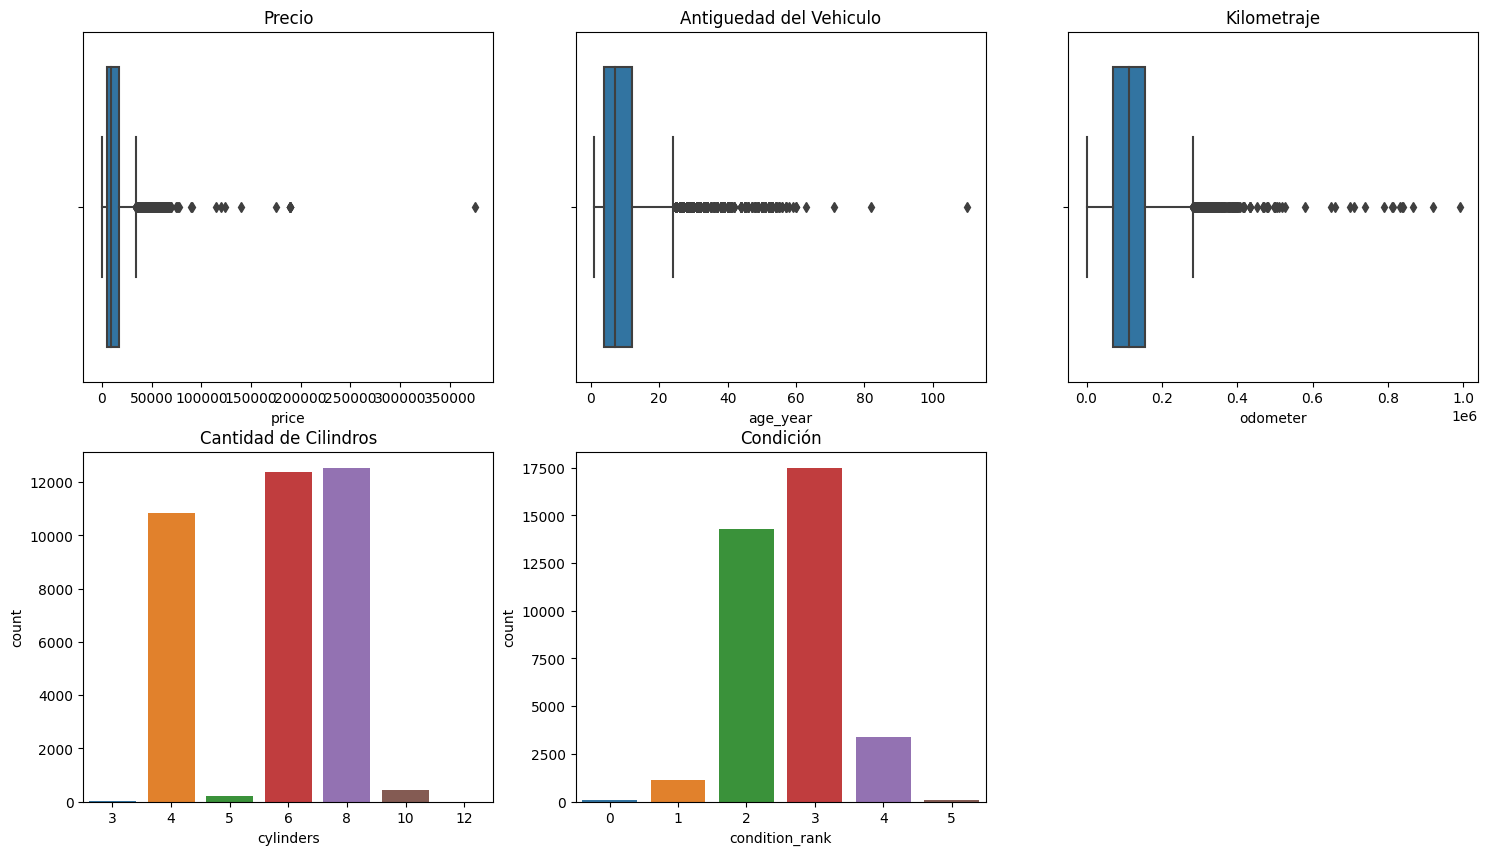

In [20]:
# Visualizacines para ver distribución de los parámetros claves

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.title('Precio')
sns.boxplot(x=data['price'])

plt.subplot(2, 3, 2)
plt.title('Antiguedad del Vehiculo')
sns.boxplot(x=data['age_year'])

plt.subplot(2, 3, 3)
plt.title('Kilometraje')
sns.boxplot(x=data['odometer'])

plt.subplot(2, 3, 4)
plt.title('Cantidad de Cilindros')
sns.countplot(x=data['cylinders'])

plt.subplot(2, 3, 5)
plt.title('Condición')
sns.countplot(x=data['condition_rank'])

plt.show()

Hallazgos:

- Las columnas `price`, `age_year` y `odometer` contienen una cantidad significativa de valores atípicos.

- La distribución de los tipos de cilindros de los vehículos se concentra principalmente en 4, 6 y 8 cilindros, lo que coincide con las configuraciones más comunes en la mayoría de los vehículos. Sin embargo, todavía hay algunos vehículos con una cantidad distinta de cilindros en el conjunto de datos.

- La mayoría de los vehículos del conjunto de datos están clasificados como de calidad moderada, dentro de las categorías "good" y "excellent".

- Para asegurar un análisis más limpio y preciso, se eliminaran todos los valores atípicos. Cabe destacar que esto puede reducir la cantidad de datos disponibles para el análisis. Sin embargo, el conjunto resultante ofrecerá una base más clara y confiable para el análisis.

### Tratamiento de los valores atípicos

En general, los valores atípicos de las tres columnas identificadas anteriormente se encuentran por encima de los bigotes superiores (upper whiskers), y no hay valores atípicos por debajo de los bigotes inferiores. Por lo tanto, solo se eliminaran los valores que estén por encima de los bigotes superiores.

Además, según la información general de los datos, no existen valores negativos. Por lo tanto, se establecerá el bigote inferior o límite inferior de los valores atípicos en 0.

Se filtrara un nuevo dataframe, para que excluya todos los valores atípicos.

In [21]:
# Definir limites inferior y superior de los valores atipicos

lower_whisker = 0

def upper_whisker(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    value = Q3 + (1.5 * IQR)
    return value

In [22]:
# Aplicacion de funcion 'upper_whiskers' para conocer los limites superiores de cada columna

print('El limite superior de la columna "price" es:', upper_whisker(data, 'price'))
print('El limite superior de la columna "age_year" es:', upper_whisker(data, 'age_year'))
print('El limite superior de la columna "odometer" es:', upper_whisker(data, 'odometer'))

El limite superior de la columna "price" es: 34750.0
El limite superior de la columna "age_year" es: 24.0
El limite superior de la columna "odometer" es: 282719.0


In [23]:
# Filtrar dataframe

df = data[(data['price'] < 34750.0) & (data['age_year'] < 24.0) & (data['odometer'] < 282718.625)].reset_index(drop=True)

In [24]:
# Verificar nuevo tamaño del dataset

df.shape

(34226, 19)

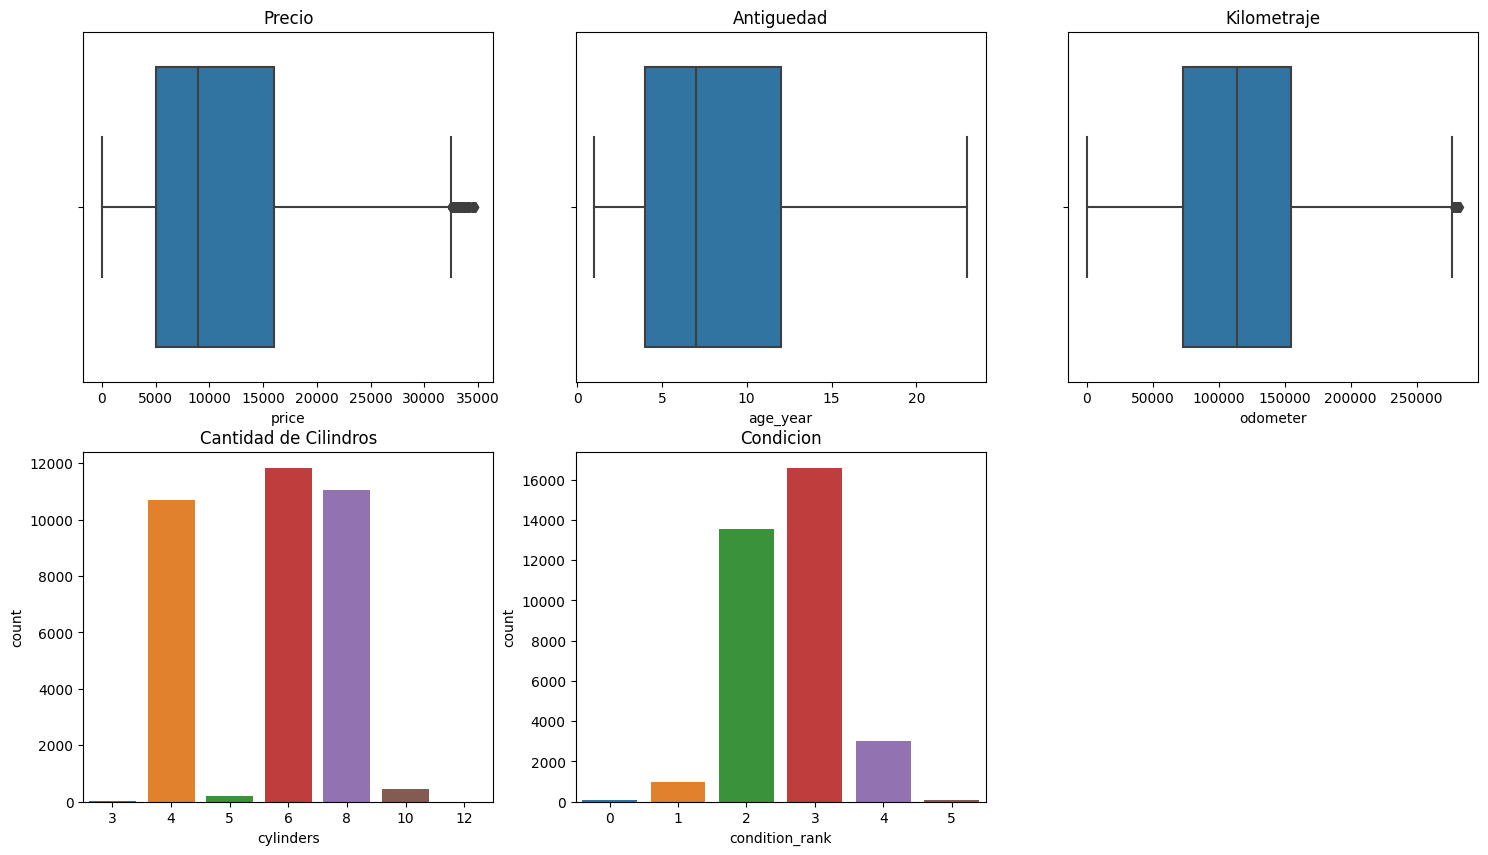

In [25]:
# Visualizacion de de los parametros claves en el nuevo dataframe

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.title('Precio')
sns.boxplot(x=df['price'])

plt.subplot(2, 3, 2)
plt.title('Antiguedad')
sns.boxplot(x=df['age_year'])

plt.subplot(2, 3, 3)
plt.title('Kilometraje')
sns.boxplot(x=df['odometer'])

plt.subplot(2, 3, 4)
plt.title('Cantidad de Cilindros')
sns.countplot(x=df['cylinders'])

plt.subplot(2, 3, 5)
plt.title('Condicion')
sns.countplot(x=df['condition_rank'])

plt.show()

Los nuevos datos aún contienen algunos puntos fuera del bigote superior, lo cual es esperable debido a la reducción del tamaño del conjunto de datos. Se procederá con estos datos tal como están. El nuevo conjunto de datos ahora cuenta con tres columnas de parámetros clave más limpios, aunque el número de filas se ha reducido a 34.226. Sin embargo, esto sigue siendo suficiente para las necesidades del proyecto.

### Examinar los parámetros clave sin valores atípicos

Comparando los datos que aún contienen valores atípicos (data) con los datos limpios sin valores atípicos (df). El enfoque será en los tres parámetros clave que anteriormente presentaron valores atípicos.

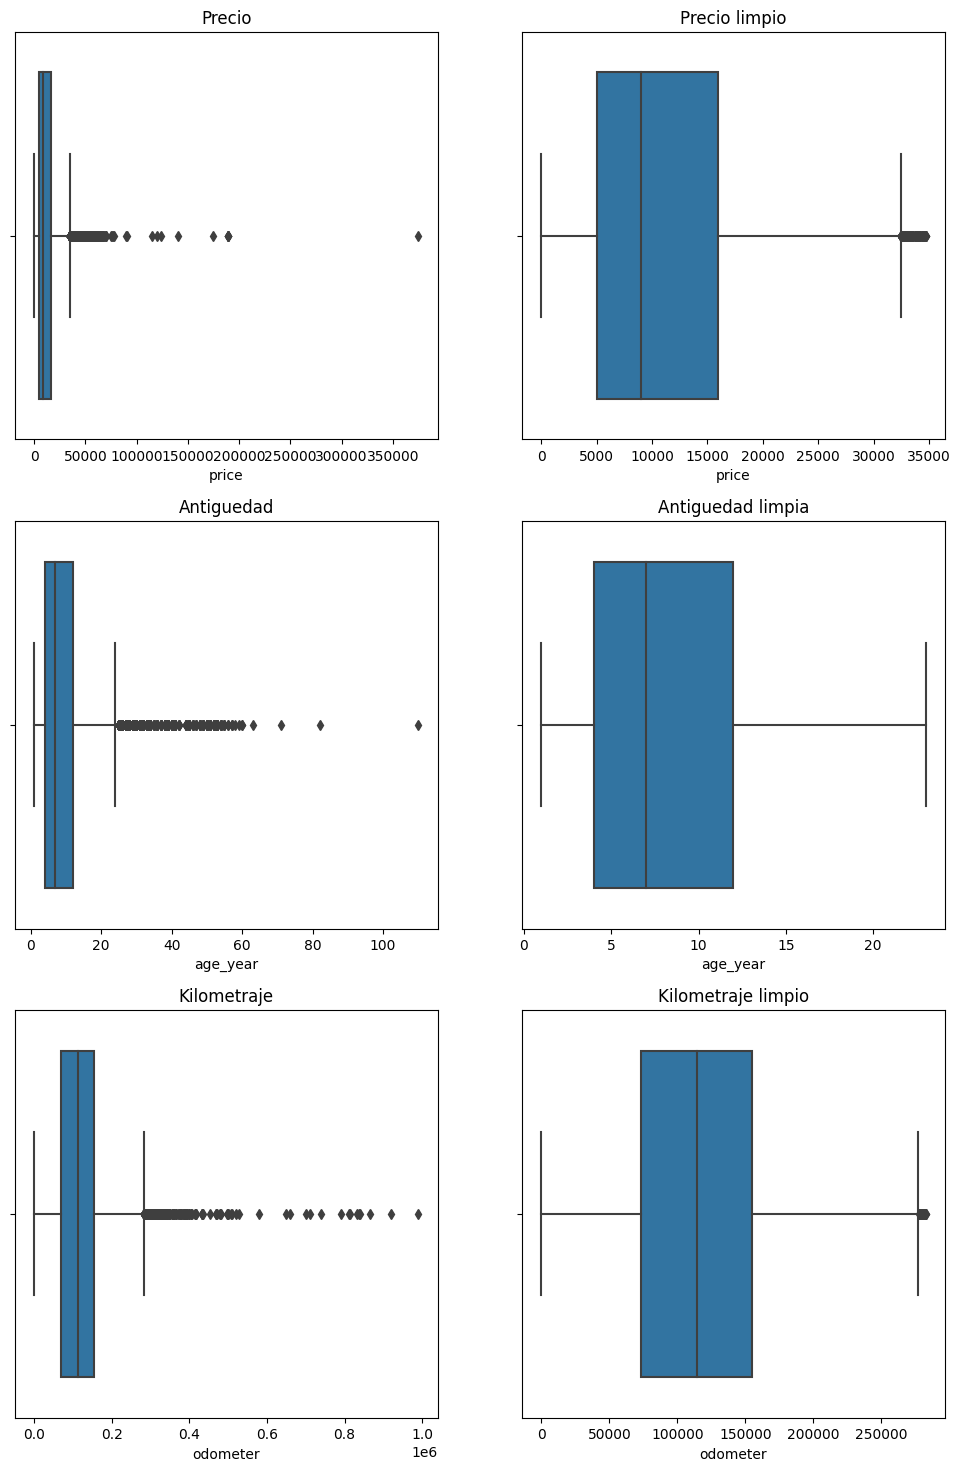

In [26]:
# Comparando la distribucion de las 3 columnas de parametros claves entre ambos datasets

plt.figure(figsize=(12, 18))

plt.subplot(3, 2, 1)
plt.title('Precio')
sns.boxplot(x=data['price'])

plt.subplot(3, 2, 2)
plt.title('Precio limpio')
sns.boxplot(x=df['price'])

plt.subplot(3, 2, 3)
plt.title('Antiguedad')
sns.boxplot(x=data['age_year'])

plt.subplot(3, 2, 4)
plt.title('Antiguedad limpia')
sns.boxplot(x=df['age_year'])

plt.subplot(3, 2, 5)
plt.title('Kilometraje')
sns.boxplot(x=data['odometer'])

plt.subplot(3, 2, 6)
plt.title('Kilometraje limpio')
sns.boxplot(x=df['odometer'])

plt.show()

La diferencia entre los datos originales (izquierda), que aún contienen valores atípicos, y los nuevos datos limpios (derecha), es bastante significativa.

In [27]:
# Comparacion descriptiva de ambos datasets

print('Descripción de los datos originales')
display(data.describe())
print()
print('Descripción de los datos limpios')
display(df.describe())

Descripción de los datos originales


,price,model_year,condition_rank,cylinders,odometer,days_listed,year_posted,age_year,mileage_per_year
count,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000
mean,12187.675417,2009.753425,2.637003,6.132596,115323.632747,39.649798,2018.306324,8.598424,17998.582847
std,10076.739680,6.265305,0.713758,1.659646,65068.650067,28.119391,0.460972,6.218145,13368.085264
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,69854.000000,19.000000,2018.000000,4.000000,10582.292208
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,33.000000,2018.000000,7.000000,15041.500000
75%,16900.000000,2014.000000,3.000000,8.000000,155000.000000,53.000000,2019.000000,12.000000,21607.125000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,2019.000000,110.000000,373200.000000



Descripción de los datos limpios


,price,model_year,condition_rank,cylinders,odometer,days_listed,year_posted,age_year,mileage_per_year
count,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000
mean,11263.696021,2010.061707,2.633086,6.062964,115115.871793,39.630515,2018.305499,8.279291,17926.379908
std,7850.834091,5.129942,0.698664,1.659057,58983.521267,28.123050,0.460625,5.086229,12511.828578
min,1.000000,1995.000000,0.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,0.000000
25%,4999.000000,2007.000000,2.000000,4.000000,73000.000000,19.000000,2018.000000,4.000000,10769.230769
50%,8995.000000,2011.000000,3.000000,6.000000,114227.500000,33.000000,2018.000000,7.000000,15059.560606
75%,15995.000000,2014.000000,3.000000,8.000000,154676.250000,53.000000,2019.000000,12.000000,21450.750000
max,34700.000000,2019.000000,5.000000,12.000000,282493.000000,271.000000,2019.000000,23.000000,195700.000000


La información común entre ambos dataframes también cambia. El número de filas se redujo de 36.418 a 34.226. Los valores de la media y la mediana (percentil 50%) se desplazaron hacia abajo. El valor mínimo (min) se mantiene igual, pero el valor máximo (max) se redujo significativamente.

### Duración del anuncio

Ahora se indagará la columna days_listed, en los nuevos datos, para medir la duración de tiempo en que un anuncio estuvo publicado.

In [28]:
# Examianr descripcion de columnna

df['days_listed'].describe()

count    34226.000000
mean        39.630515
std         28.123050
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [29]:
# Verificar el valor con mayor frecuencia en la columna

df['days_listed'].mode()

0    24
dtype: int64

In [30]:
# Contar los registros con el valor 24 en la columna 'days_listed'

df[df['days_listed'] == 24]['days_listed'].count()

655

En promedio (media), los anuncios se muestran durante aproximadamente 40 días antes de que el vehículo sea vendido o el anuncio eliminado. La mayoría de los anuncios se muestran durante 24 días, que es la moda y representa la duración más común.

El tiempo mínimo (min) que un anuncio estuvo publicado es de 0 días, lo que indica que algunos anuncios podrían haber sido eliminados o cancelados de inmediato. Por otro lado, el tiempo máximo (max) que un anuncio estuvo activo es de 271 días, lo que equivale a aproximadamente 9 meses.

Para comprender mejor la distribución de estos datos, los visualizará mediante un histograma u otros métodos apropiados.

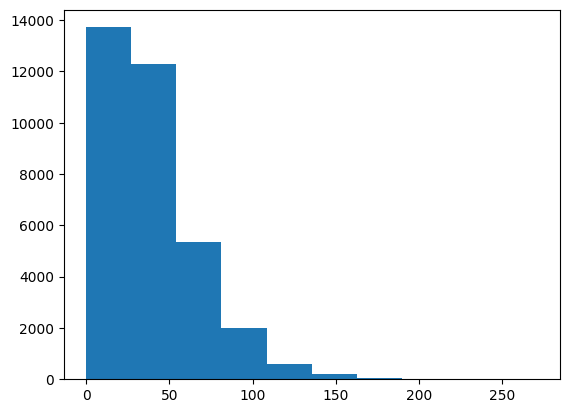

In [31]:
# Verificar la expiracion de los anuncios

plt.hist(df['days_listed'])
plt.show()

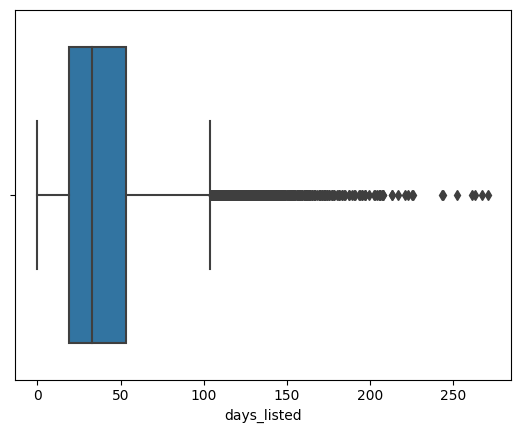

In [32]:
# Verificar valores atipicos

sns.boxplot(x=df['days_listed'])
plt.show()

El histograma muestra que la mayoría de los anuncios se publican por menos de 50 días, lo que indica que la mayoría de los vehículos se venden en ese período. Sin embargo, también hay una cantidad significativa de anuncios que permanecen activos por períodos más largos, llegando hasta 271 días.

La duración de la publicación de un anuncio puede verse influida por diversos factores como el precio del vehículo, su tipo, condición o antigüedad. Es posible que los vehículos con precios más altos o con ciertas características necesiten más tiempo para encontrar comprador. Se puede realizar un análisis adicional para explorar la relación entre estos factores y la duración del anuncio.

En general, esta información ofrece una visión general sobre cómo se comportan los anuncios de vehículos en términos de duración en la plataforma.

### Precio promedio por tipo de vehículo

A continuación, se calculará la cantidad de anuncios y el precio promedio para cada tipo de vehículo. Además, se indagará la relación entre la cantidad de anuncios y el tipo de vehículo. Posteriormente, se seleccionaran los dos tipos de vehículos con mayor número de anuncios.

In [33]:
# Crear tabla con columnas de precio promedio y el número de anuncios

mean_price = df. pivot_table(index='type', values='price', aggfunc=['mean', 'count'])
mean_price.columns = ['average_price', 'number_of_list']
mean_price.sort_values(by='number_of_list', ascending=False)

,average_price,number_of_list
type,,
sedan,6984.115571,8445
SUV,10531.326681,8418
truck,15057.539104,7902
pickup,15202.944194,4444
coupe,13437.230345,1450
wagon,8886.777568,1061
mini-van,8171.119804,818
hatchback,6685.497878,707
van,9031.925301,415


In [34]:
# Calcular la correlación entre ambas columnas

mean_price['average_price'].corr(mean_price['number_of_list'])

-0.03896121723736776

El tipo de vehículo con mayor número de anuncios no está directamente correlacionado con el precio. Los vehículos más anunciados no son necesariamente los más caros ni los más baratos. De hecho, la correlación entre la cantidad de anuncios y el precio es muy baja (-0.04).

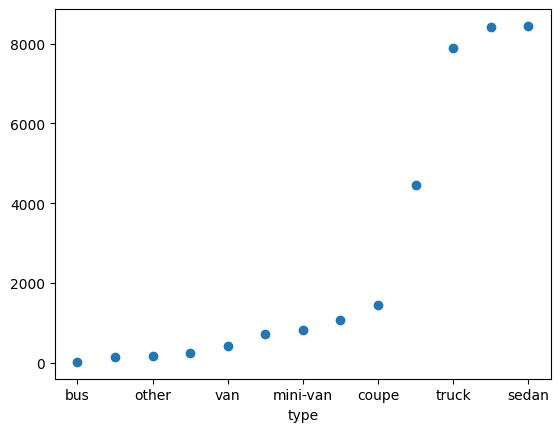

In [35]:
# Verificar la cantidad de anuncios por tipo de vehiculo

mean_price['number_of_list'].sort_values().plot(style='o')
plt.show()

Según el gráfico, se puede observar un aumento significativo en la cantidad de anuncios para los tres tipos de vehículos más populares en comparación con los demás. Por lo tanto, para el análisis posterior, se centrará en los dos tipos con mayor número de anuncios, es decir, sedanes y SUVs.

## Factor Precio

Ahora se realizará un análisis para investigar los factores que más influyen en el precio de los vehículos. Específicamente, el enfoque de este análisis en los dos tipos de vehículos más populares: sedanes y SUVs.

Para evaluar la correlación entre el precio de estos tipos de vehículos y varios parámetros, se consideraran los siguientes factores:

- Antiguedad del vehículo (age_year)

- Kilometraje (odometer)

- Condición (condition_rank)

- Tipo de transmisión (transmission)

- Color de pintura (paint_color)

Primero se analizaran los vehículos tipo sedán, y posteriormente el análisis de los SUVs.

### Sedan

In [36]:
# Crear dataframe especificamente para la categoria 'sedan'

df_sedan = df[df['type'] == 'sedan'].reset_index(drop=True)
df_sedan = df_sedan[['price','age_year', 'odometer', 'condition_rank', 'transmission', 'paint_color']]

In [37]:
# Analizar la correlación de los parametros con el precio

df_sedan.corr()['price']

price             1.000000
age_year         -0.639002
odometer         -0.556728
condition_rank    0.296588
Name: price, dtype: float64

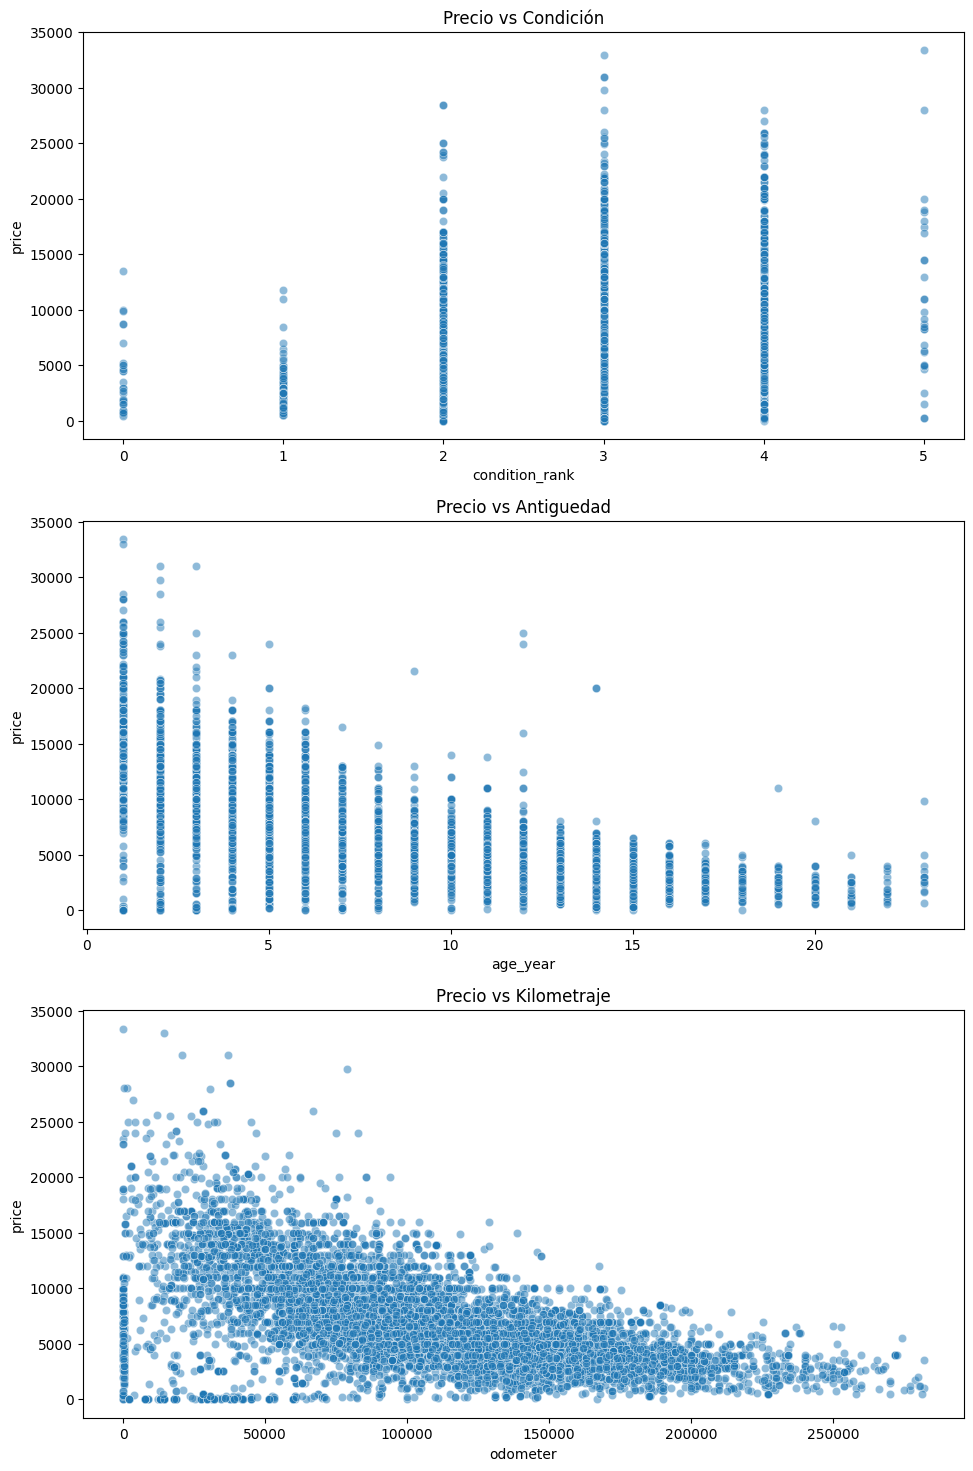

In [38]:
# Analizar la correlación entre 'precio' y las variables de condicion, antiguedad y kilometraje del vehiculo

plt.figure(figsize=(25, 18))

plt.subplot(3, 2, 1)
plt.title('Precio vs Condición')
sns.scatterplot(data=df_sedan, x='condition_rank', y='price', alpha=0.5)

plt.subplot(3, 2, 3)
plt.title('Precio vs Antiguedad')
sns.scatterplot(data=df_sedan, x='age_year', y='price', alpha=0.5)

plt.subplot(3, 2, 5)
plt.title('Precio vs Kilometraje')
sns.scatterplot(data=df_sedan, x='odometer', y='price', alpha=0.5)

plt.show()

Basado en el análisis de correlación, se observa una correlación negativa significativa entre el precio de los vehículos sedán, su antiguedad y kilometraje. A medida que aumenta la edad o el kilometraje, el precio tiende a disminuir.

Por otro lado, existe una correlación positiva débil entre el precio y la condición de los sedanes. Sin embargo, es importante destacar que mejorar la condición del vehículo no garantiza necesariamente un precio más alto. Los precios parecen ser relativamente más altos para vehículos de calidad moderada (niveles 2, 3, 4) en comparación con aquellos de alta calidad (nivel 5).

A continuación, se analizaran las correlaciones en las variables categóricas, específicamente el tipo de transmisión (`transmission`) y el color del vehículo (`paint_color`).

Para asegurar la validez del análisis, primero se estudiará la cantidad de anuncios en cada categoría dentro de estas variables. Idealmente, se necesitan al menos 50 anuncios por categoría para garantizar una representación suficiente en el análisis.

In [39]:
# Verificar la suma de cada valor en la columna 'transmission'

df_sedan['transmission'].value_counts()

automatic    7930
manual        410
other         105
Name: transmission, dtype: int64

In [40]:
# Verificar la su de cada valor en la columna 'paint_color'

df_sedan['paint_color'].value_counts()

unknown    1514
silver     1426
black      1231
grey       1142
white      1073
blue        859
red         662
custom      197
brown       169
green       136
purple       17
yellow       12
orange        7
Name: paint_color, dtype: int64

La variable `transmission` parece tener un número suficiente de anuncios en cada categoría, lo que permite realizar un análisis válido. Sin embargo, la característica `paint_color` contiene tres categorías —morado (purple), amarillo (yellow) y naranja (orange)— que no cumplen con el mínimo de 50 anuncios por categoría. Por lo tanto, estas tres categorías de color seran excluidas del análisis.

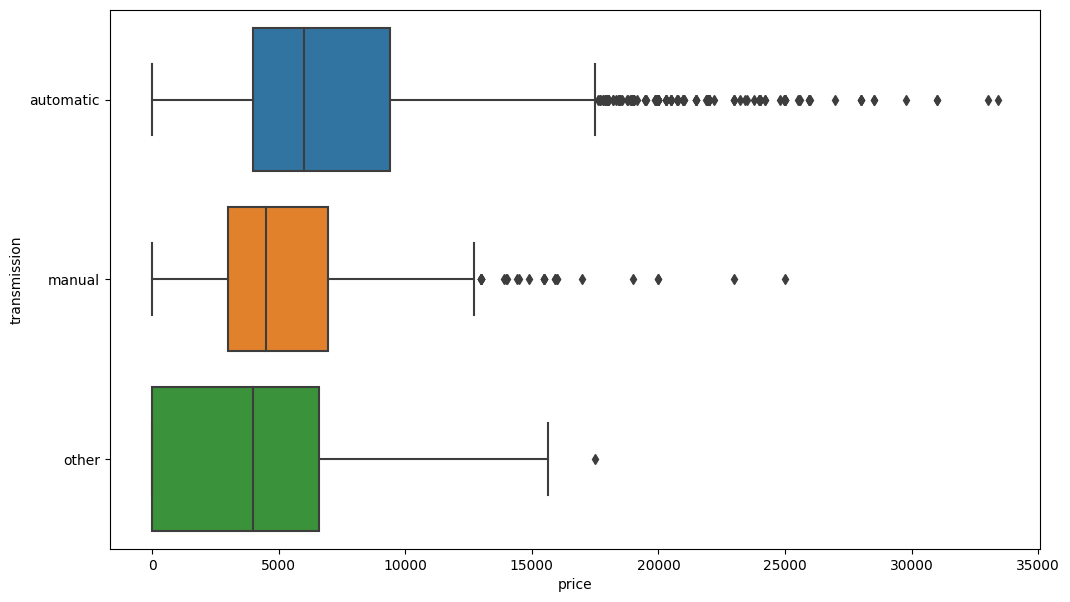

In [41]:
# Correlacion entre el precio y la transmision

plt.figure(figsize=(12,7))
sns.boxplot(data=df_sedan, x='price', y='transmission')
plt.show()

Es evidente que los vehículos con transmisión automática tienden a tener precios más altos en comparación con los vehículos con transmisión manual u otros tipos. El análisis de correlación sugiere una relación positiva entre el tipo de transmisión y el precio del vehículo, lo que indica que los vehículos automáticos suelen tener un precio más elevado que los de transmisión manual u otros.

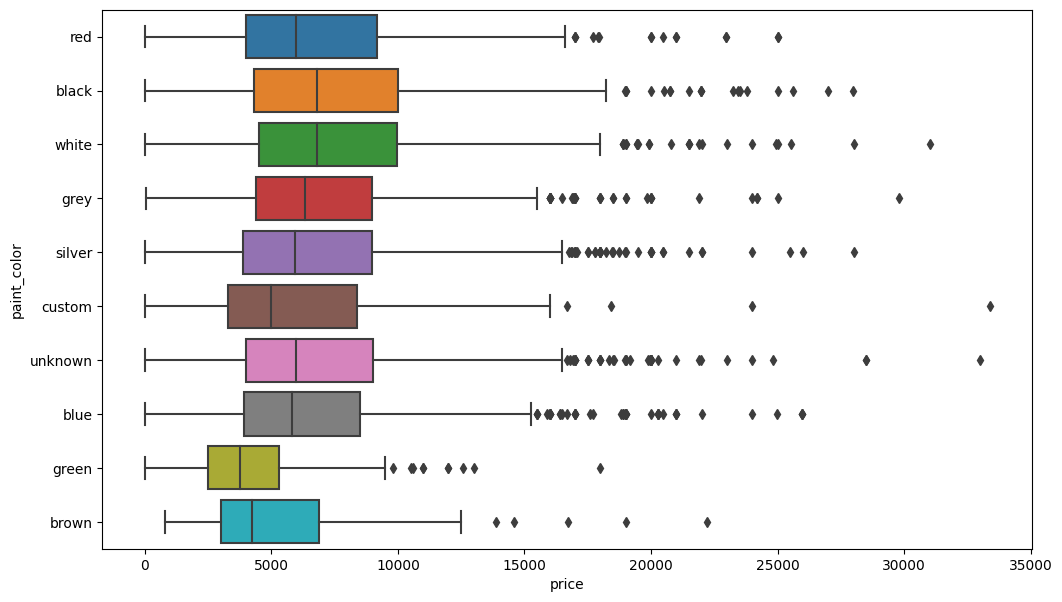

In [42]:
# Correlacion entre el precio y el color del vehiculo

df_sedan_color = df_sedan[~df_sedan['paint_color'].isin(['purple', 'yellow', 'orange'])]
plt.figure(figsize=(12,7))
sns.boxplot(data=df_sedan_color, x='price', y='paint_color')
plt.show()

La correlación entre el precio y el color del vehículo es relativamente baja, lo que indica que no existe una diferencia significativa de precio entre los distintos colores. El color del vehículo parece tener un impacto mínimo en el precio de los sedan.

Ahora, se prosigue con el análisis del tipo SUV. Se empleará el mismo proceso para examinar la correlación entre el precio y los parámetros de antiguedad, kilometraje, condición, tipo de transmisión y color para los SUVs.

### SUVs

In [44]:
# Crear dataframe especificamente para la categoria 'SUV'

df_suv = df[df['type'] == 'SUV'].reset_index(drop=True)
df_suv = df[['price','age_year', 'odometer', 'condition_rank', 'transmission', 'paint_color']]

In [46]:
# Analizar la correlación de los parametros con el precio

df_suv.corr()['price']

price             1.000000
age_year         -0.533737
odometer         -0.435377
condition_rank    0.186926
Name: price, dtype: float64

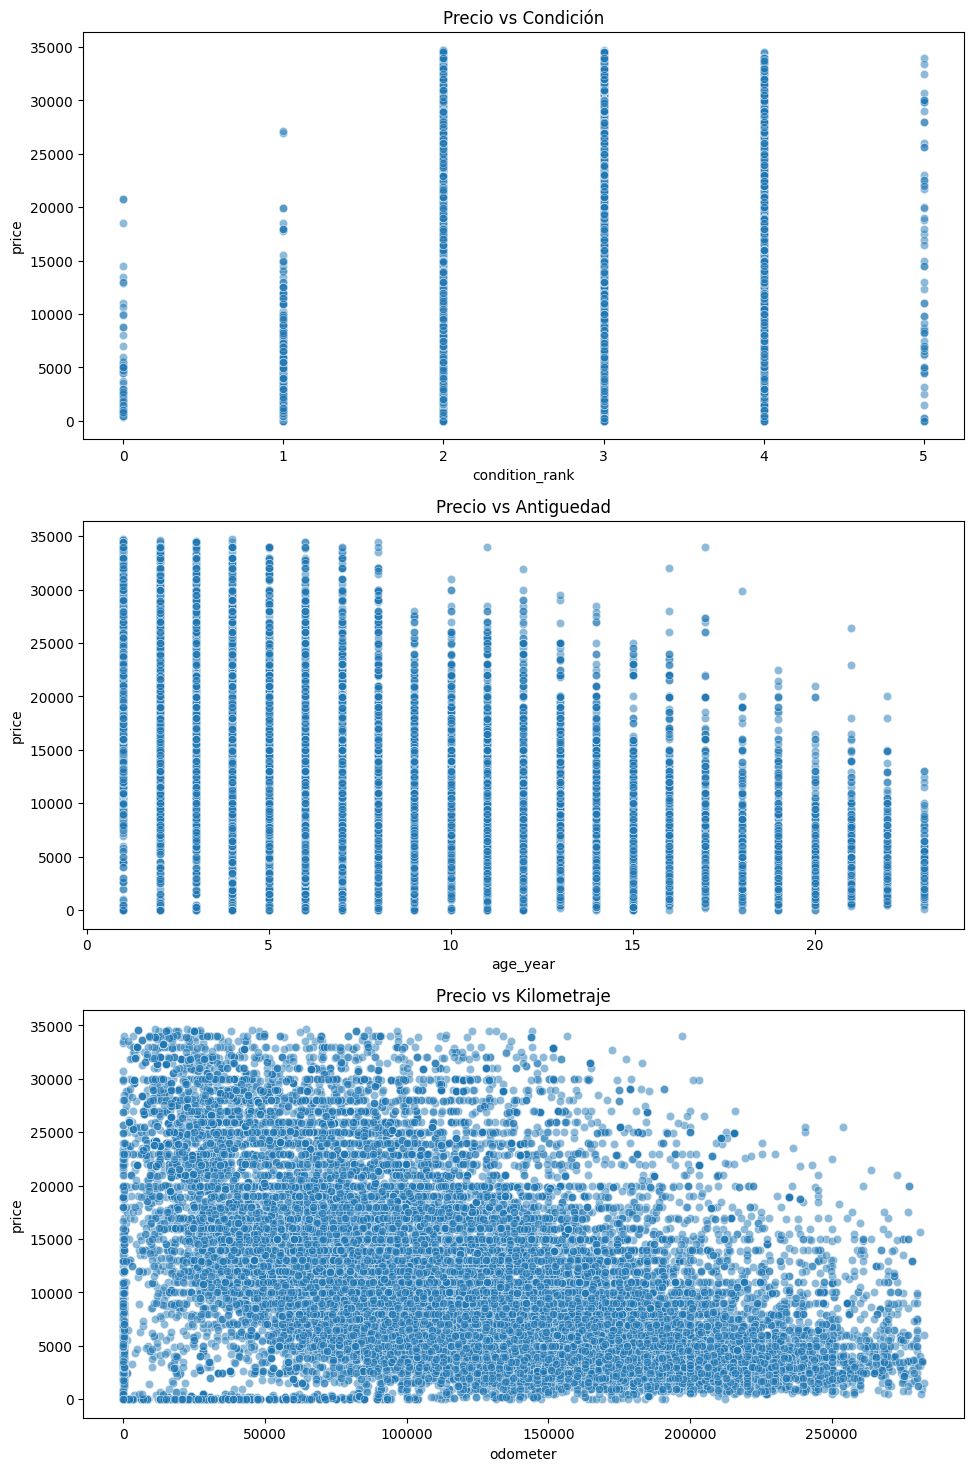

In [47]:
# Analizar la correlación entre 'precio' y las variables de condicion, antiguedad y kilometraje del vehiculo

plt.figure(figsize=(25, 18))

plt.subplot(3, 2, 1)
plt.title('Precio vs Condición')
sns.scatterplot(data=df_suv, x='condition_rank', y='price', alpha=0.5)

plt.subplot(3, 2, 3)
plt.title('Precio vs Antiguedad')
sns.scatterplot(data=df_suv, x='age_year', y='price', alpha=0.5)

plt.subplot(3, 2, 5)
plt.title('Precio vs Kilometraje')
sns.scatterplot(data=df_suv, x='odometer', y='price', alpha=0.5)

plt.show()

El patrón de correlación en los SUVs es relativamente similar al de los sedanes, pero con coeficientes de correlación más bajos. La columna `age_year` presenta una correlación de -0.533737, la columna `odometer` tiene una correlación de -0.435377, y la columna `condition_rank` muestra una correlación de 0.186926.

Al igual que en los sedanes, la correlación con la columna `condition_rank` indica que los SUVs de calidad media tienden a tener precios más altos.

A continuación, se revisará la validez de las variables categóricas `transmission` y `paint_color`, examinando la cantidad de anuncios en cada categoría. Se necesitan al menos 50 anuncios por categoría para asegurar la validez del análisis.

In [50]:
# Verificar la suma de cada valor en la columna 'transmission'

df_suv['transmission'].value_counts()

automatic    31250
manual        1732
other         1244
Name: transmission, dtype: int64

In [51]:
# Verificar la su de cada valor en la columna 'paint_color'

df_suv['paint_color'].value_counts()

white      6576
unknown    6110
black      5105
silver     4272
grey       3412
blue       2977
red        2937
green       887
custom      788
brown       788
yellow      162
orange      148
purple       64
Name: paint_color, dtype: int64

Dado que todas las categorías en las variables `transmission` y `paint_color` tienen más de 50 anuncios, podemos continuar con el análisis.

Se examinaran las correlaciones entre el precio y las variables categóricas para los SUVs. Primero, se estudiará la correlación con la variable transmission.

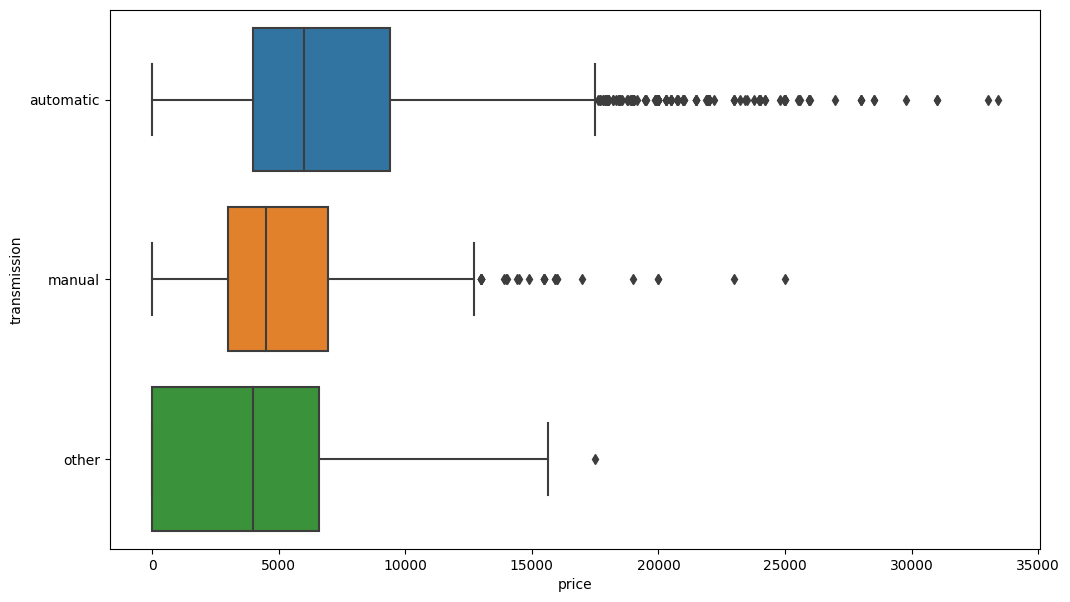

In [48]:
# Correlacion entre el precio y la transmision

plt.figure(figsize=(12,7))
sns.boxplot(data=df_sedan, x='price', y='transmission')
plt.show()

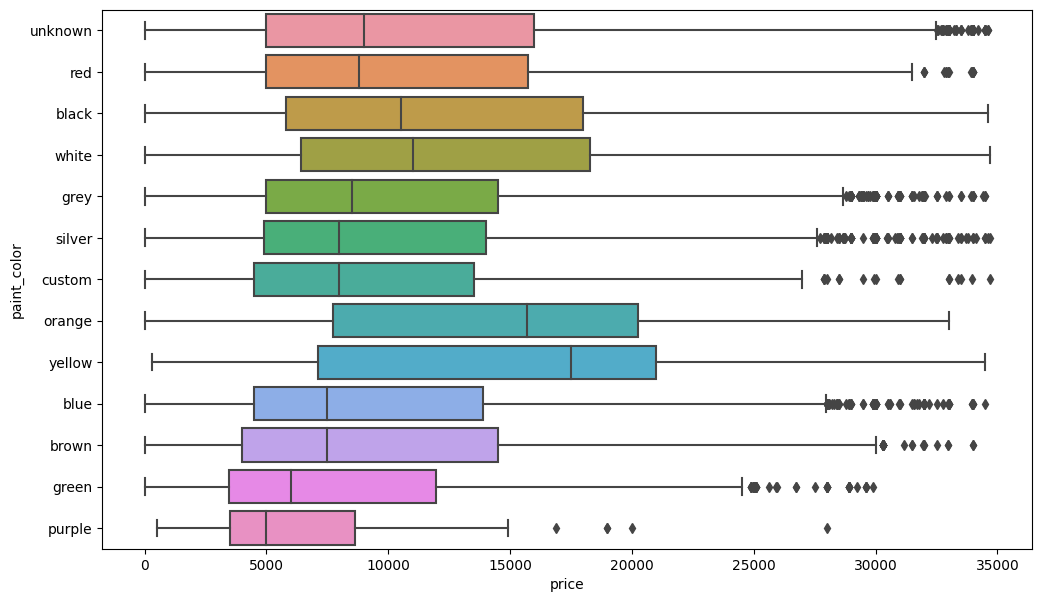

In [52]:
# Correlacion entre el precio y el color del vehiculo

plt.figure(figsize=(12,7))
sns.boxplot(data=df_suv, x='price', y='paint_color')
plt.show()

Se puede apreciar que en los SUVs, el tipo de transmisión "otro" está asociado a precios medianos más altos en comparación con las transmisiones automática y manual. Además, los SUVs de color naranja y amarillo tienden a presentar niveles de precio más altos en comparación con otros colores.

Estos hallazgos ofrecen información valiosa para comprender los factores que influyen en los precios de los SUVs. Al considerar tanto el tipo de vehículo como sus variables categóricas asociadas, se obtiene una comprensión más completa de los patrones de precios.

## Conclusión general

Con base en el análisis exploratorio de datos(EDA), realizado sobre el conjunto de datos de Crankshaft List, se identifican varios hallazgos claves. La antiguedad y el kilometraje del vehículo tienen un impacto significativo en el precio, siendo que a mayor edad y mayor kilometraje, el precio tiende a disminuir. Sin embargo, la correlación entre precio y condición del vehículo es relativamente débil.

Además, el análisis revela que la relación entre el precio y las variables categóricas varía según el tipo de vehículo. En los sedanes, el tipo de transmisión desempeña un papel más relevante en la determinación del precio, con transmisiones automáticas asociadas generalmente a precios más altos. En cambio, en los SUVs, el tipo de transmisión "otro" parece estar asociado a los precios más altos.

Respecto al color, en los sedanes, no se observan variaciones significativas de precio según el color, en los SUVs, ciertos colores como el naranja y el amarillo presentan precios más elevados.

En conclusión, al analizar los precios de los vehículos en el conjunto de datos Crankshaft List, es fundamental tener en cuenta la antiguedad, el kilometraje y el tipo de transmisión, mientras que el impacto de la condición del vehículo y el color es relativamente menor.

Estos hallazgos pueden ser de gran utilidad para compradores, vendedores y analistas que deseen entender los principales factores que influyen en el precio de los vehículos en este conjunto de datos.